## Project Title: TextClassifierML – TF-IDF,ML & Ensemble for AI vs Human




Dataset Link: https://www.kaggle.com/datasets/pratyushpuri/ai-vs-human-content-detection-1000-record-in-2025/code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report,auc)

from sklearn.inspection import permutation_importance

# ***Dataset Load***

In [ ]:
df_ai_human = pd.read_csv('/content/drive/MyDrive/Dataset /ai_human_content_detection_dataset.csv')

In [ ]:
df_ai_human

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,Congress month from thought instead anything. ...,academic_paper,251,1677,44,0.9721,5.70,5.69,0.0262,50.72,8.02,0,0.1232,112.37,0.6893,0.2415,0
1363,Learn lead reveal great action. Left theory pa...,article,79,503,15,0.9620,5.27,5.38,0.0298,60.13,6.16,0,0.2369,111.76,0.6263,-0.8244,0
1364,Third few low hard peace paper pass front. Mea...,social_media,15,94,3,1.0000,5.00,5.33,0.0319,NaN,4.67,0,0.1296,37.37,0.2182,0.8319,0
1365,Power word west very news. Truth action base p...,blog_post,92,578,14,0.9891,6.57,5.29,0.0242,61.31,7.41,0,0.1898,46.58,0.1151,0.1486,0


In [ ]:
df_ai_human.shape

(1367, 17)

In [ ]:
import pandas as pd
# check column
print(df_ai_human.columns)

Index(['text_content', 'content_type', 'word_count', 'character_count',
       'sentence_count', 'lexical_diversity', 'avg_sentence_length',
       'avg_word_length', 'punctuation_ratio', 'flesch_reading_ease',
       'gunning_fog_index', 'grammar_errors', 'passive_voice_ratio',
       'predictability_score', 'burstiness', 'sentiment_score', 'label'],
      dtype='object')


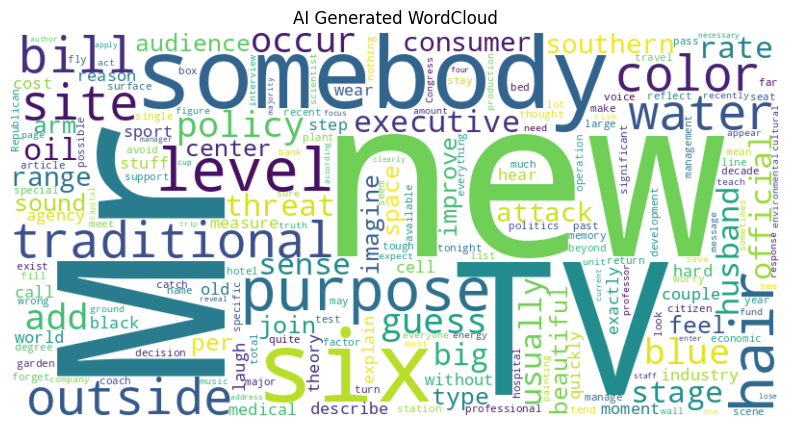

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text1 = " ".join(df_ai_human['text_content'].astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(all_text1)

plt.figure(figsize=(10, 5))
plt.title('AI Generated WordCloud')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



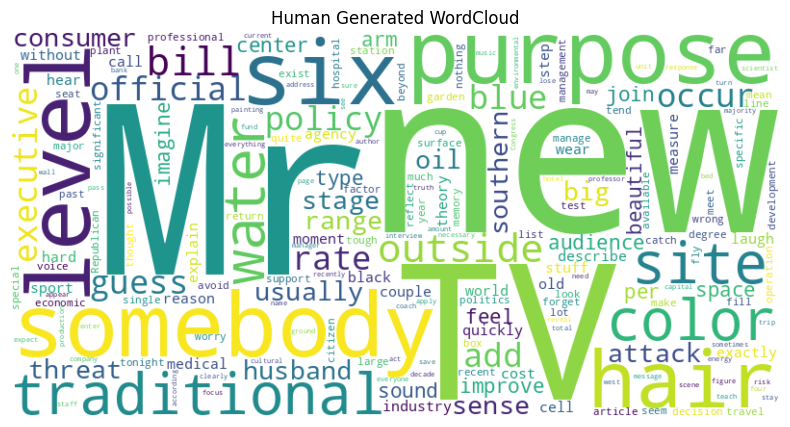

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text2 = " ".join(df_ai_human['text_content'].astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(all_text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Human Generated WordCloud')
plt.show()

## ***Data Analysis***

In [ ]:
df_ai_human.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [ ]:
df_ai_human.tail()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
1362,Congress month from thought instead anything. ...,academic_paper,251,1677,44,0.9721,5.70,5.69,0.0262,50.72,8.02,0,0.1232,112.37,0.6893,0.2415,0
1363,Learn lead reveal great action. Left theory pa...,article,79,503,15,0.9620,5.27,5.38,0.0298,60.13,6.16,0,0.2369,111.76,0.6263,-0.8244,0
1364,Third few low hard peace paper pass front. Mea...,social_media,15,94,3,1.0000,5.00,5.33,0.0319,NaN,4.67,0,0.1296,37.37,0.2182,0.8319,0
1365,Power word west very news. Truth action base p...,blog_post,92,578,14,0.9891,6.57,5.29,0.0242,61.31,7.41,0,0.1898,46.58,0.1151,0.1486,0
1366,Beyond card must former. Leave where join kind...,blog_post,192,1270,34,0.9844,5.65,5.62,0.0268,49.09,7.88,0,0.0762,25.94,0.2506,0.8069,0


In [ ]:
df_ai_human.isnull().values.any()

np.True_

In [ ]:
df_ai_human = df_ai_human.dropna()
df_ai_human.isnull().values.any()

np.False_

In [ ]:
df_ai_human.shape

(1179, 17)

In [ ]:
df_ai_human.isna().sum()

,0
text_content,0
content_type,0
word_count,0
character_count,0
sentence_count,0
lexical_diversity,0
avg_sentence_length,0
avg_word_length,0
punctuation_ratio,0
flesch_reading_ease,0


In [ ]:
df_ai_human.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1179 non-null   object 
 1   content_type          1179 non-null   object 
 2   word_count            1179 non-null   int64  
 3   character_count       1179 non-null   int64  
 4   sentence_count        1179 non-null   int64  
 5   lexical_diversity     1179 non-null   float64
 6   avg_sentence_length   1179 non-null   float64
 7   avg_word_length       1179 non-null   float64
 8   punctuation_ratio     1179 non-null   float64
 9   flesch_reading_ease   1179 non-null   float64
 10  gunning_fog_index     1179 non-null   float64
 11  grammar_errors        1179 non-null   int64  
 12  passive_voice_ratio   1179 non-null   float64
 13  predictability_score  1179 non-null   float64
 14  burstiness            1179 non-null   float64
 15  sentiment_score       1179

In [ ]:
# Text Length Characteristics

# Word Count Analysis

word_count_analysis = df_ai_human.groupby(["content_type", "label"])["word_count"].agg(["sum","median", "mean", "std"]).unstack()
word_count_analysis.columns = ["Human Total Word Count","AI Total Word Count", "Human Generated Median", "AI Generated Median", "Mean Human Generated", "Mean AI Generated", "Std Dev Human Generated", "Std Dev AI Generated"]

word_count_analysis

,Human Total Word Count,AI Total Word Count,Human Generated Median,AI Generated Median,Mean Human Generated,Mean AI Generated,Std Dev Human Generated,Std Dev AI Generated
content_type,,,,,,,,
academic_paper,23876,26607,302.0,327.0,294.765432,313.023529,82.112008,93.925880
article,9840,6972,129.0,96.5,121.481481,102.529412,56.723476,51.631724
blog_post,7878,10974,119.0,111.5,119.363636,114.312500,61.687210,57.689972
creative_writing,8027,8723,115.5,120.0,108.472973,119.493151,54.587676,56.391273
essay,12587,12599,180.0,187.0,179.814286,188.044776,68.612183,62.412225
news_article,9700,9723,125.5,132.5,121.250000,127.934211,58.951278,53.264957
product_review,7775,7460,102.0,137.0,112.681159,126.440678,58.733319,58.178759
social_media,1195,1239,15.0,19.0,17.573529,18.772727,9.537540,8.286774


In [ ]:
# Content Type Analysis

content_analysis = df_ai_human.groupby(['content_type', 'label']).size().unstack(fill_value=0)
content_analysis.columns = ['Human Generated', 'AI Generated']
content_analysis["Total Count"] = content_analysis["Human Generated"] + content_analysis["AI Generated"]
content_analysis["Chance of AI Generated"] = ((content_analysis["AI Generated"] / content_analysis["Total Count"]) * 100).round(2)
content_analysis["Chance of Human Generated"] = ((content_analysis["Human Generated"] / content_analysis["Total Count"]) * 100).round(2)

content_analysis

,Human Generated,AI Generated,Total Count,Chance of AI Generated,Chance of Human Generated
content_type,,,,,
academic_paper,81,85,166,51.20,48.80
article,81,68,149,45.64,54.36
blog_post,66,96,162,59.26,40.74
creative_writing,74,73,147,49.66,50.34
essay,70,67,137,48.91,51.09
news_article,80,76,156,48.72,51.28
product_review,69,59,128,46.09,53.91
social_media,68,66,134,49.25,50.75


In [ ]:
# Character Count Analysis

character_count_analysis = df_ai_human.groupby(["content_type", "label"])["character_count"].agg(["sum", "median", "mean", "std"]).unstack()
character_count_analysis.columns = ["Human Total Character Count","AI Total Character Count", "Human Generated Median", "AI Generated Median", "Mean Human Generated", "Mean AI Generated", "Std Dev Human Generated", "Std Dev AI Generated"]

character_count_analysis

,Human Total Character Count,AI Total Character Count,Human Generated Median,AI Generated Median,Mean Human Generated,Mean AI Generated,Std Dev Human Generated,Std Dev AI Generated
content_type,,,,,,,,
academic_paper,160359,178834,2048.0,2192.0,1979.740741,2103.929412,547.286620,631.122107
article,65972,46931,868.0,655.5,814.469136,690.161765,380.624621,344.131987
blog_post,52664,73716,791.0,748.5,797.939394,767.875000,413.467955,389.280233
creative_writing,53902,58400,772.5,806.0,728.405405,800.000000,367.518965,375.151266
essay,84343,84816,1186.5,1223.0,1204.900000,1265.910448,459.145083,427.515434
news_article,64867,64985,821.0,888.5,810.837500,855.065789,394.397327,354.788551
product_review,52064,50222,690.0,929.0,754.550725,851.220339,392.070617,390.285398
social_media,7934,8193,101.5,118.5,116.676471,124.136364,63.776064,56.578301


In [ ]:
# Sentence Count Analysis

sentence_count_analysis = df_ai_human.groupby(["content_type", "label"])["sentence_count"].agg(["sum", "median", "mean", "std"]).unstack()
sentence_count_analysis.columns = ["Human Total Sentence Count","AI Total Sentence Count", "Human Generated Median", "AI Generated Median", "Mean Human Generated", "Mean AI Generated", "Std Dev Human Generated", "Std Dev AI Generated"]

sentence_count_analysis



,Human Total Sentence Count,AI Total Sentence Count,Human Generated Median,AI Generated Median,Mean Human Generated,Mean AI Generated,Std Dev Human Generated,Std Dev AI Generated
content_type,,,,,,,,
academic_paper,4362,4869,54.0,60.0,53.851852,57.282353,15.243942,17.330548
article,1788,1277,23.0,17.0,22.074074,18.779412,10.363129,9.432946
blog_post,1433,2003,21.0,21.0,21.712121,20.864583,11.466024,10.566700
creative_writing,1444,1585,21.0,22.0,19.513514,21.712329,9.768896,10.505924
essay,2314,2305,34.0,34.0,33.057143,34.402985,12.656998,11.834797
news_article,1780,1768,22.5,23.5,22.250000,23.263158,10.966578,9.731555
product_review,1411,1356,18.0,25.0,20.449275,22.983051,10.922907,10.640669
social_media,224,234,3.0,3.0,3.294118,3.545455,1.779307,1.560886


In [ ]:
# Grammar & Errors

grammar_analysis = df_ai_human.groupby(["content_type","label"])["grammar_errors"].agg(["sum", "mean", "median", "std"]).unstack()
grammar_analysis.columns = ["Human Generated Total", "AI Generated Total", "Human Generated Mean", "AI Generated Mean", "Human Generated Median", "AI Generated Median", "Human Generated StdDev", "AI Generated StdDev"]

grammar_analysis

,Human Generated Total,AI Generated Total,Human Generated Mean,AI Generated Mean,Human Generated Median,AI Generated Median,Human Generated StdDev,AI Generated StdDev
content_type,,,,,,,,
academic_paper,203,241,2.506173,2.835294,2.0,2.0,2.564778,2.750961
article,106,90,1.308642,1.323529,0.0,1.0,1.625131,1.615607
blog_post,99,112,1.500000,1.166667,0.0,0.0,1.994222,1.533257
creative_writing,94,85,1.270270,1.164384,0.0,0.0,1.769585,1.518531
essay,143,126,2.042857,1.880597,1.5,1.0,2.115750,2.279835
news_article,106,120,1.325000,1.578947,0.5,1.0,1.674643,1.745571
product_review,104,68,1.507246,1.152542,1.0,0.0,1.605351,1.494975
social_media,72,79,1.058824,1.196970,0.0,1.0,1.380919,1.383637


In [ ]:
# Sentiment Analysis

sentiment_analysis = df_ai_human.groupby(["content_type","label"])["sentiment_score"].agg(["mean", "median", "std"]).unstack()
sentiment_analysis.columns = ["Human Generated Mean", "AI Generated Mean", "Human Generated Median", "AI Generated Median", "Human Generated StdDev", "AI Generated StdDev"]

sentiment_analysis



,Human Generated Mean,AI Generated Mean,Human Generated Median,AI Generated Median,Human Generated StdDev,AI Generated StdDev
content_type,,,,,,
academic_paper,0.044212,0.000781,0.06620,0.01200,0.595641,0.641205
article,-0.112870,-0.032307,-0.13210,0.03430,0.619235,0.628259
blog_post,0.008461,0.033404,0.01540,-0.01910,0.573777,0.587747
creative_writing,0.004914,-0.042149,0.00595,-0.02130,0.511567,0.597792
essay,0.087327,0.059666,0.22240,0.12690,0.610697,0.587692
news_article,-0.162010,0.040597,-0.26460,-0.02615,0.570109,0.577183
product_review,0.035429,-0.072807,0.02930,-0.01620,0.596287,0.578757
social_media,0.016540,0.062214,-0.04080,0.08770,0.575352,0.596186


In [ ]:
df_ai_human.describe()

,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
count,1179.00000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,140.09754,939.950806,25.575064,0.967592,5.492392,5.721349,0.027406,52.093079,7.557286,1.567430,0.149918,63.141077,0.427259,-0.002566,0.500424
std,98.36175,660.868244,18.057071,0.026207,0.452961,0.286955,0.002866,10.564724,1.865698,1.932518,0.056925,28.323529,0.199299,0.591635,0.500212
min,3.00000,14.000000,1.000000,0.875000,3.000000,4.000000,0.019400,-50.010000,1.200000,0.000000,0.050000,20.030000,0.101900,-0.999300,0.000000
25%,59.00000,400.500000,11.000000,0.951750,5.290000,5.590000,0.026100,47.660000,6.620000,0.000000,0.099150,39.290000,0.250600,-0.523950,0.000000
50%,130.00000,882.000000,24.000000,0.969100,5.490000,5.710000,0.027200,52.170000,7.510000,1.000000,0.150400,57.260000,0.413300,-0.006300,1.000000
75%,192.00000,1287.500000,35.000000,0.989000,5.700000,5.830000,0.028400,57.275000,8.395000,3.000000,0.200200,87.360000,0.592000,0.520600,1.000000
max,443.00000,2966.000000,83.000000,1.000000,8.000000,8.330000,0.071400,98.870000,27.870000,10.000000,0.250000,119.930000,0.798400,0.995900,1.000000


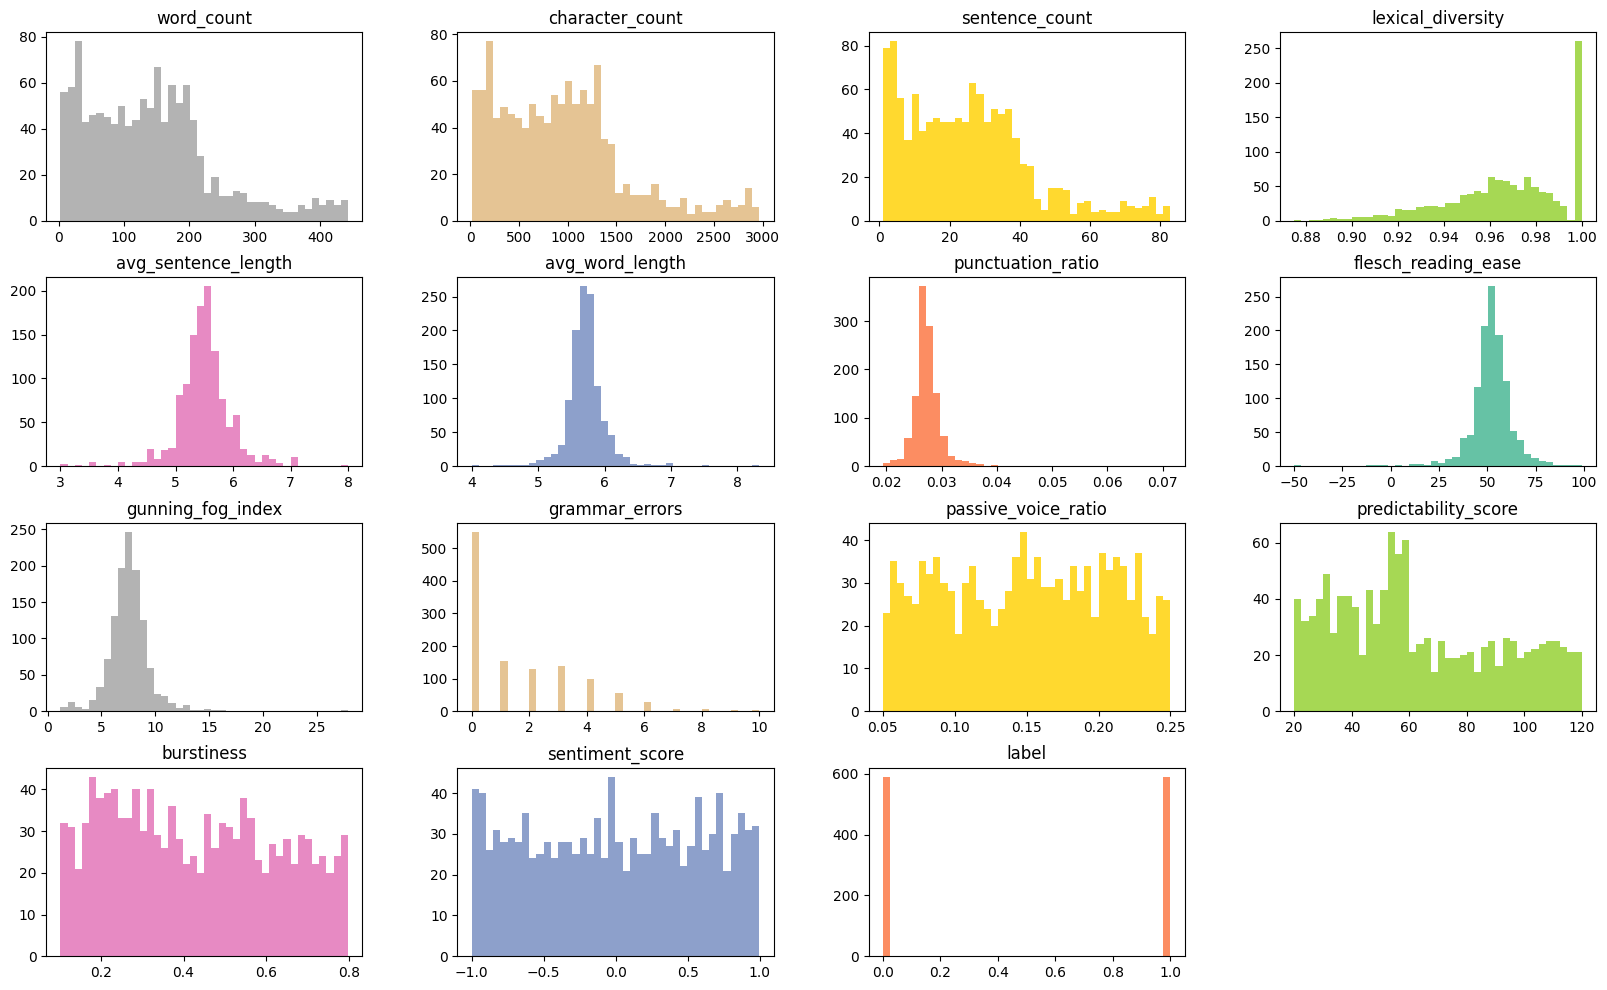

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms
axes = df_ai_human.hist(
    bins=40,
    grid=False,
    figsize=(20, 12)
)

# Flatten axes
axes = axes.flatten()

# Use a colormap with enough distinct colors
colors = plt.cm.Set2_r.colors  # (you can try tab20, tab10, rainbow too)

# Assign a new color for each histogram
for i, ax in enumerate(axes):
    for patch in ax.patches:   # histogram bars
        patch.set_facecolor(colors[i % len(colors)])

plt.show()



# Categorical Features


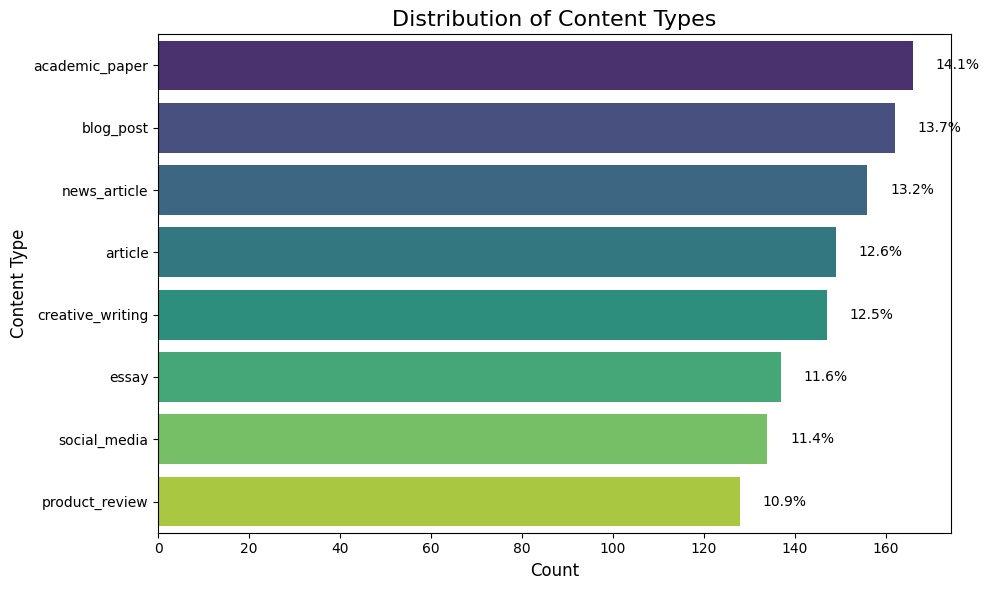

In [ ]:
# Countplot of content types
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='content_type', data=df_ai_human, order=df_ai_human['content_type'].value_counts().index,
                  palette='viridis')
plt.title('Distribution of Content Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Content Type', fontsize=12)

# Add percentages
total = len(df_ai_human)
for p in ax.patches:
    percentage = f'{100 * p.get_width()/total:.1f}%'
    x = p.get_width() + 5
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y), va='center')

plt.tight_layout()
plt.savefig('content_distribution.png', bbox_inches='tight')
plt.show()




# Numerical Feature

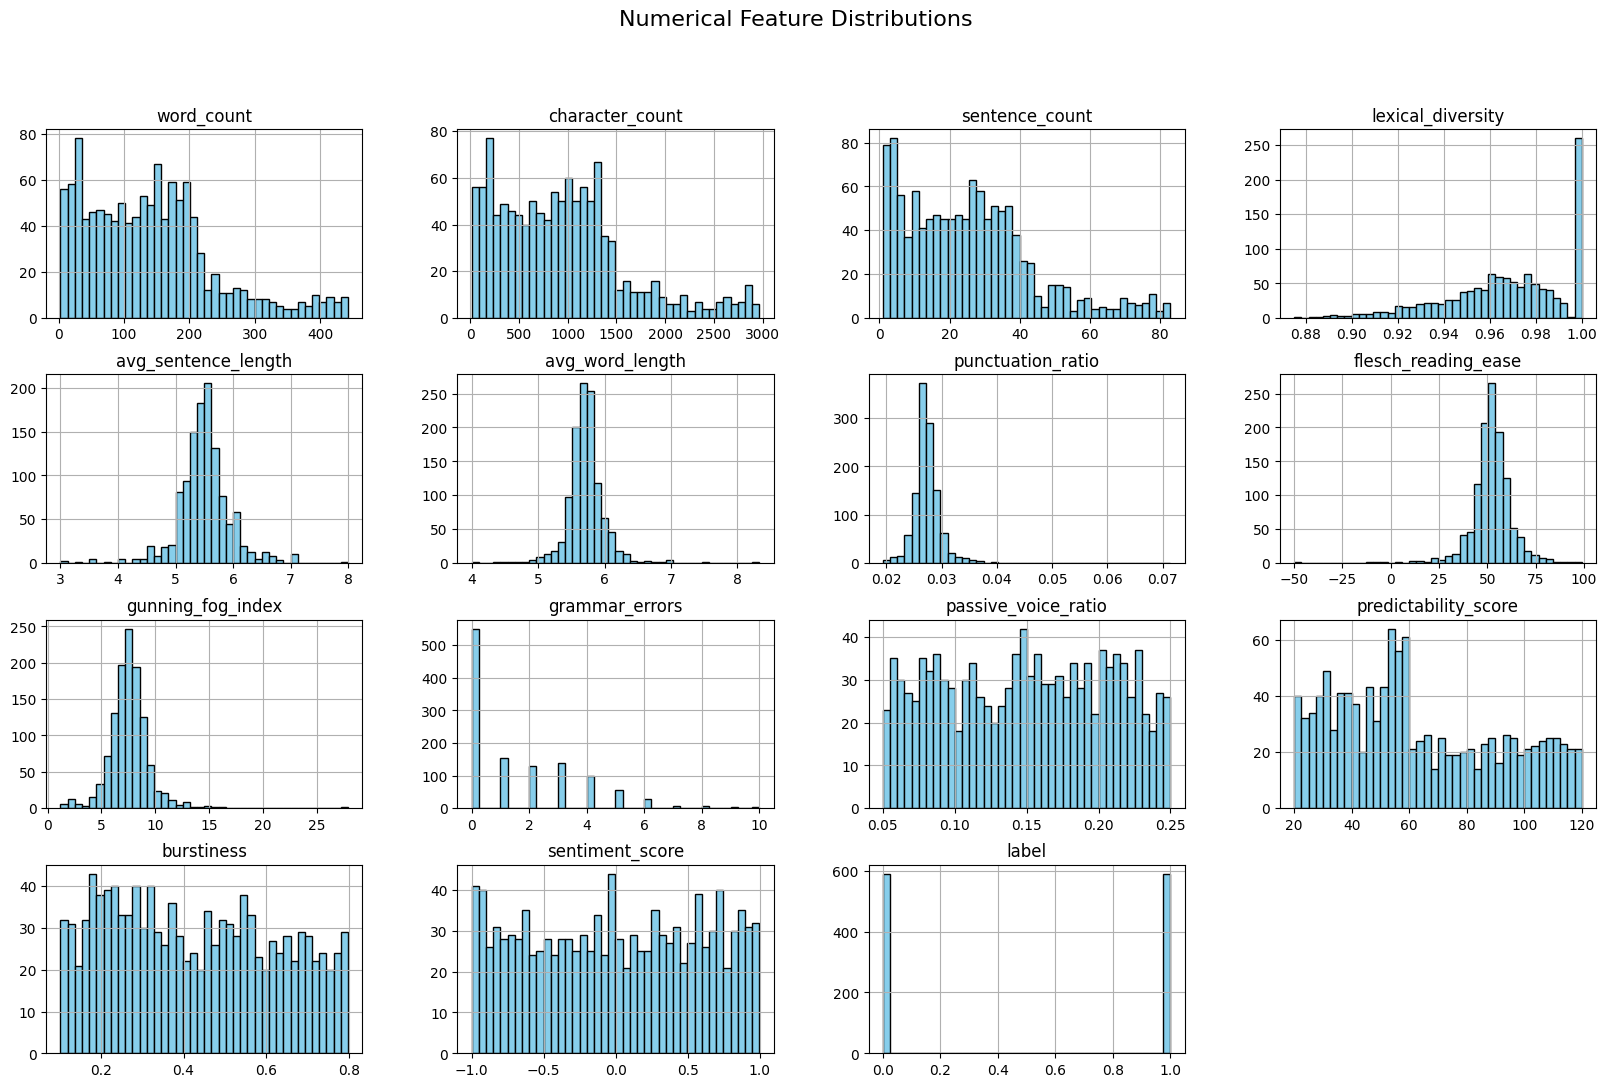

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = df_ai_human.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for all numerical features
df_ai_human[numerical_features].hist(bins=40, figsize=(20, 12), color='skyblue', edgecolor='black')
plt.suptitle("Numerical Feature Distributions", fontsize=16)
plt.show()


# Boxplot

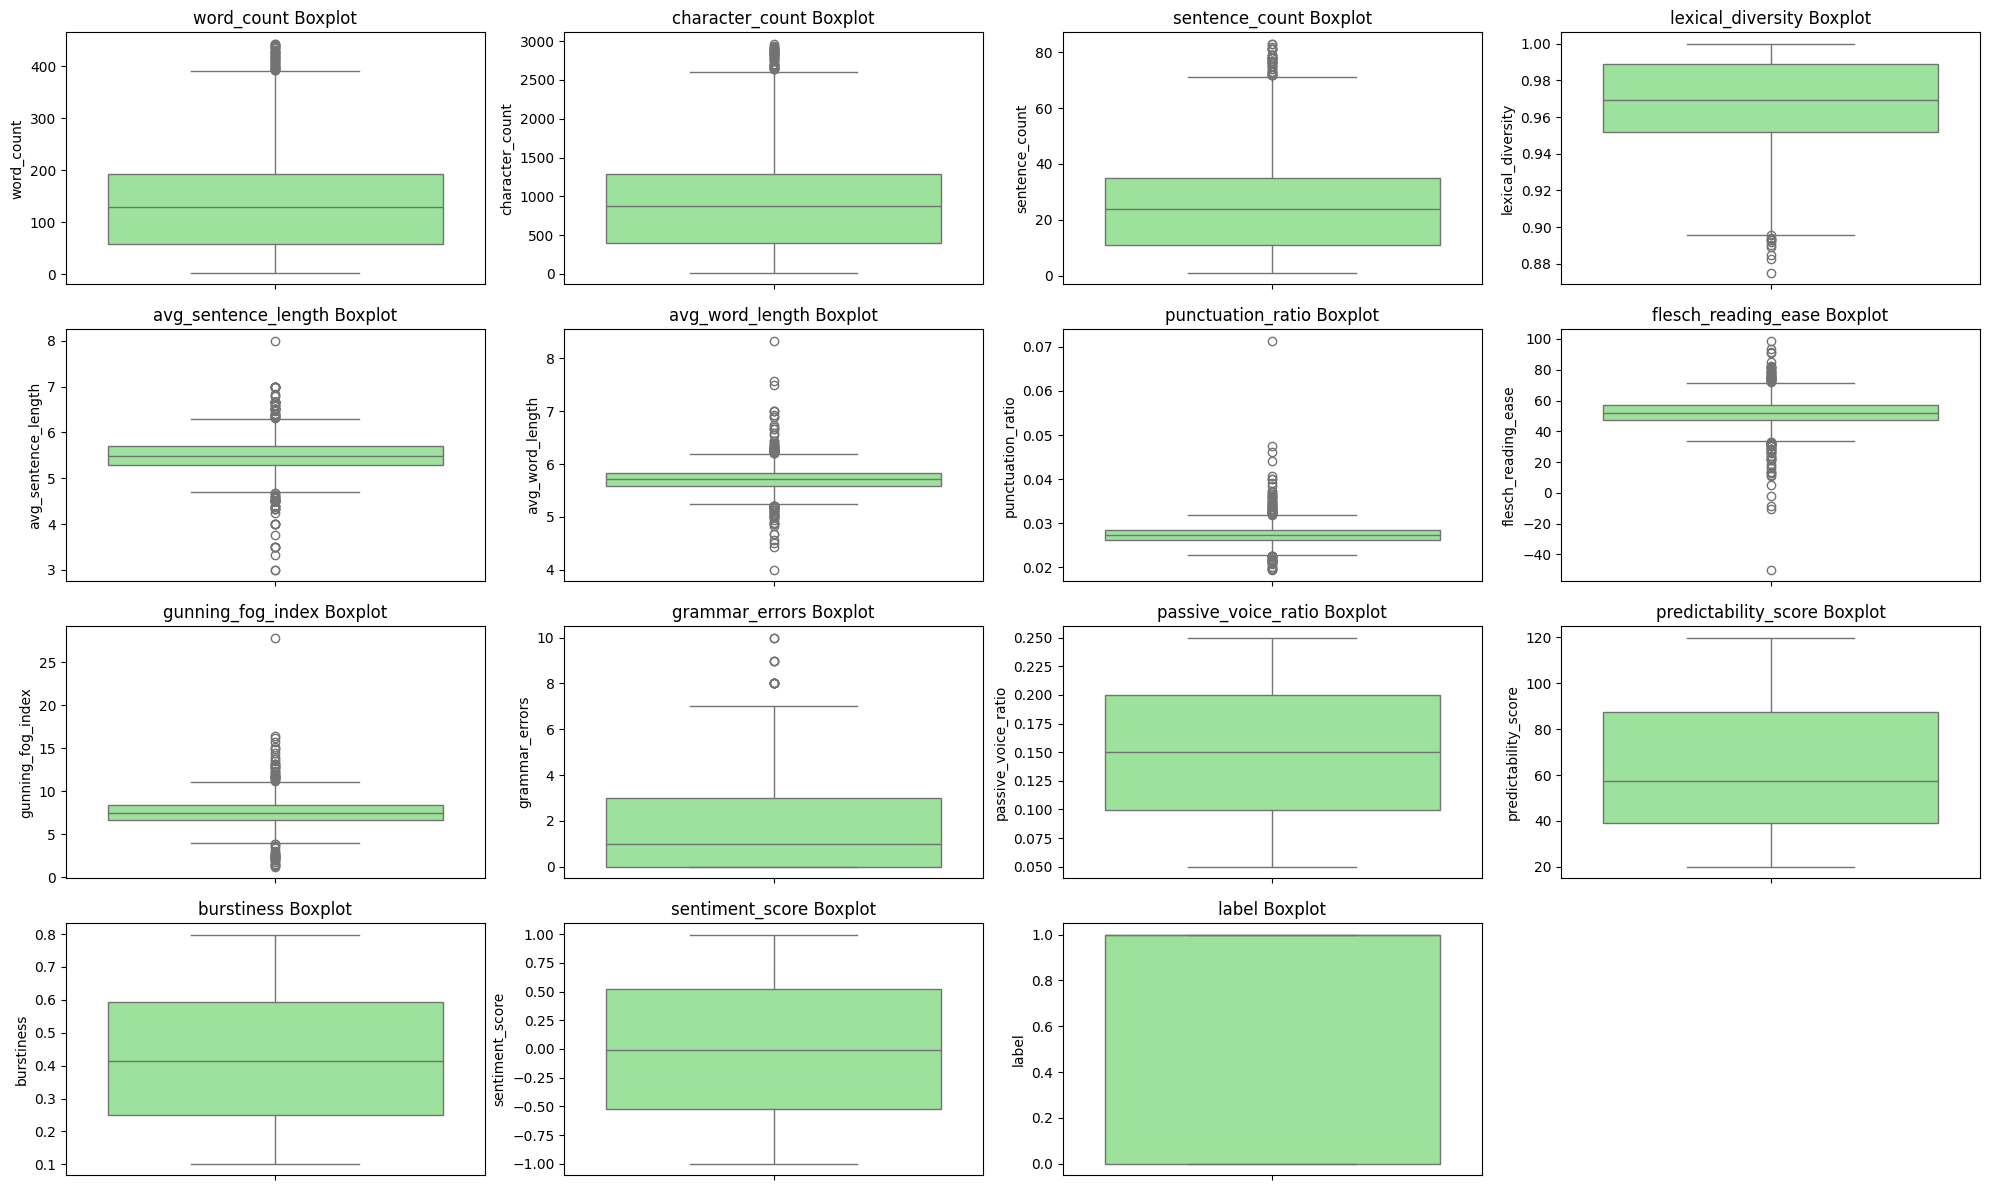

In [ ]:
# Boxplots for outlier detection
plt.figure(figsize=(20, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  # adjust grid based on number of features
    sns.boxplot(y=df_ai_human[col], color='lightgreen')
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

# checking for outliers


In [ ]:
# Define key features with outlier potential
outlier_features = ['word_count', 'burstiness', 'predictability_score',
                    'passive_voice_ratio', 'gunning_fog_index']

# Calculate outlier thresholds
outlier_report = {}
for feature in outlier_features:
    Q1 = df_ai_human[feature].quantile(0.25)
    Q3 = df_ai_human[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_ai_human[(df_ai_human[feature] < lower_bound) | (df_ai_human[feature] > upper_bound)]
    outlier_pct = len(outliers)/len(df_ai_human)*100

    outlier_report[feature] = {
        'outliers_count': len(outliers),
        'outlier_pct': outlier_pct,
        'min_val': df_ai_human[feature].min(),
        'max_val': df_ai_human[feature].max(),
        'examples': outliers[['content_type', feature]].head(2).values.tolist()
    }

# Display report
pd.DataFrame(outlier_report).T

,outliers_count,outlier_pct,min_val,max_val,examples
word_count,40,3.392706,3,443,"[[academic_paper, 420], [academic_paper, 425]]"
burstiness,0,0.0,0.1019,0.7984,[]
predictability_score,0,0.0,20.03,119.93,[]
passive_voice_ratio,0,0.0,0.05,0.25,[]
gunning_fog_index,62,5.258694,1.2,27.87,"[[social_media, 2.4], [social_media, 2.0]]"


Outliers are not removed because their proportion is below 7%, their presence in burstiness and predictability may capture important AI-related patterns, and such variations can be normal in long essays or articles.


In [ ]:
df_ai_human.label.value_counts()

,count
label,
1,590
0,589


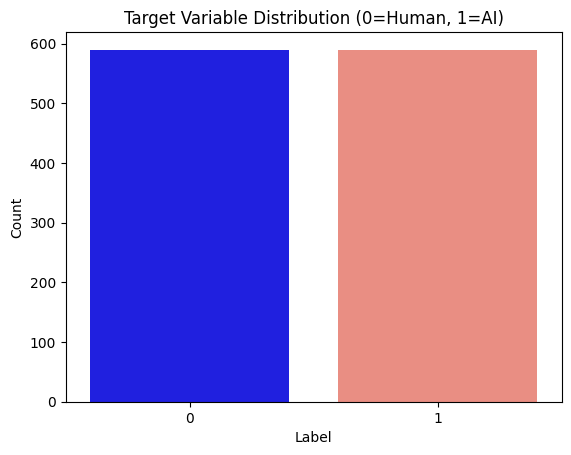

In [ ]:
# Countplot with custom colors
sns.countplot(data=df_ai_human, x='label', palette=['blue', 'salmon'])
plt.title("Target Variable Distribution (0=Human, 1=AI)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Number of Texts per Content Type

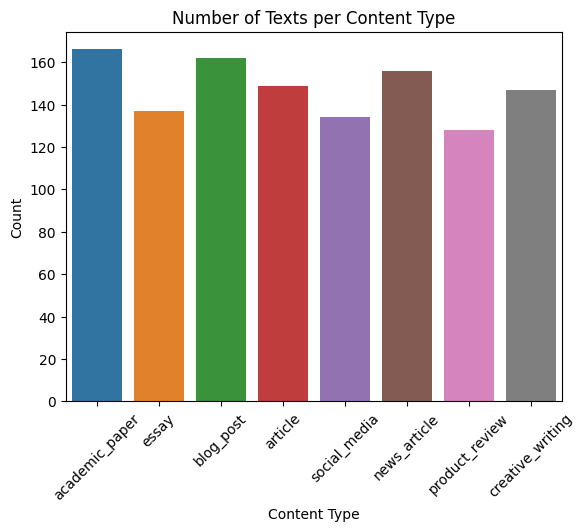

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

sns.countplot(data=df_ai_human, x='content_type', palette=colors)
plt.title('Number of Texts per Content Type')
plt.ylabel('Count')
plt.xlabel('Content Type')
plt.xticks(rotation=45)
plt.show()


# Word Count Distribution by Content Type

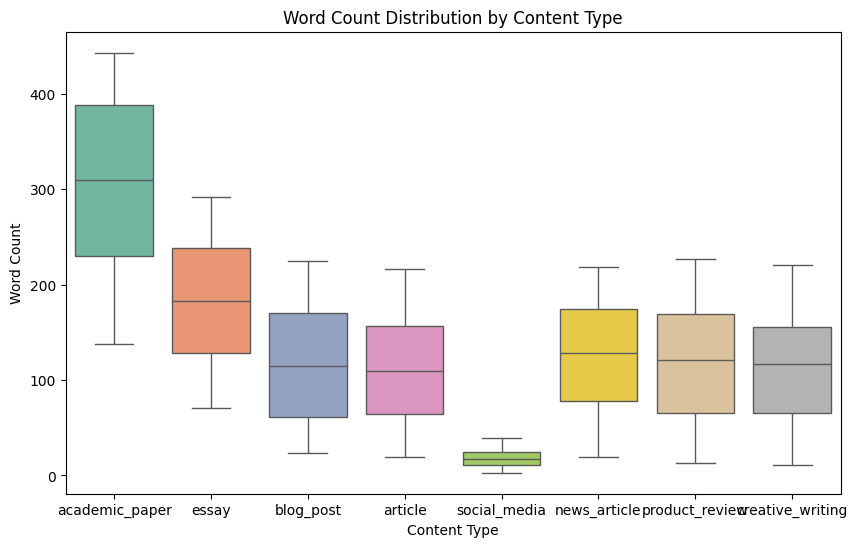

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_ai_human, x='content_type', y='word_count', palette='Set2')
plt.title('Word Count Distribution by Content Type')
plt.ylabel('Word Count')
plt.xlabel('Content Type')
plt.show()

The distribution of word counts across different content types is shown.
Higher word counts are observed in *academic papers* and *essays*, while shorter lengths are displayed in *social media posts*.
Moderate ranges are represented by *blog posts, articles, news articles, product reviews,* and *creative writing*.
Variation in length is captured by the spread of each box, with academic papers showing the widest range.


# Content Type by Label

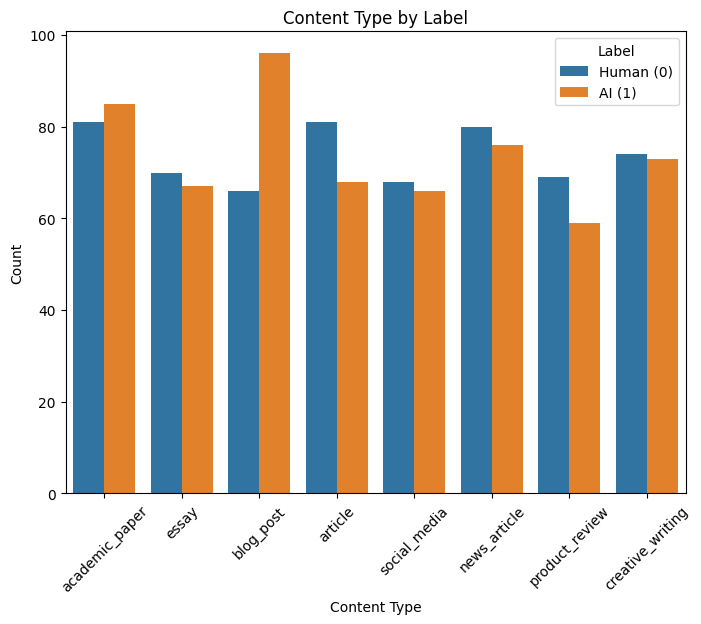

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_ai_human, x="content_type", hue="label")
plt.title("Content Type by Label")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Label", labels=["Human (0)", "AI (1)"])
plt.show()

# Grammar errors by content type

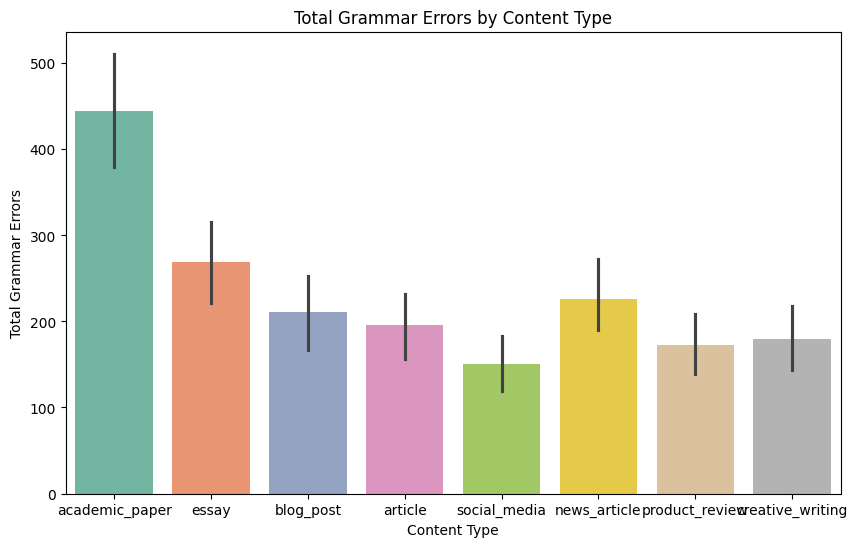

In [ ]:
# Grammar errors by content type
plt.figure(figsize=(10,6))
sns.barplot(data=df_ai_human, x="content_type", y="grammar_errors", estimator=sum, palette='Set2')
plt.title("Total Grammar Errors by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Total Grammar Errors")
plt.show()


# Passive voice ratio by content type

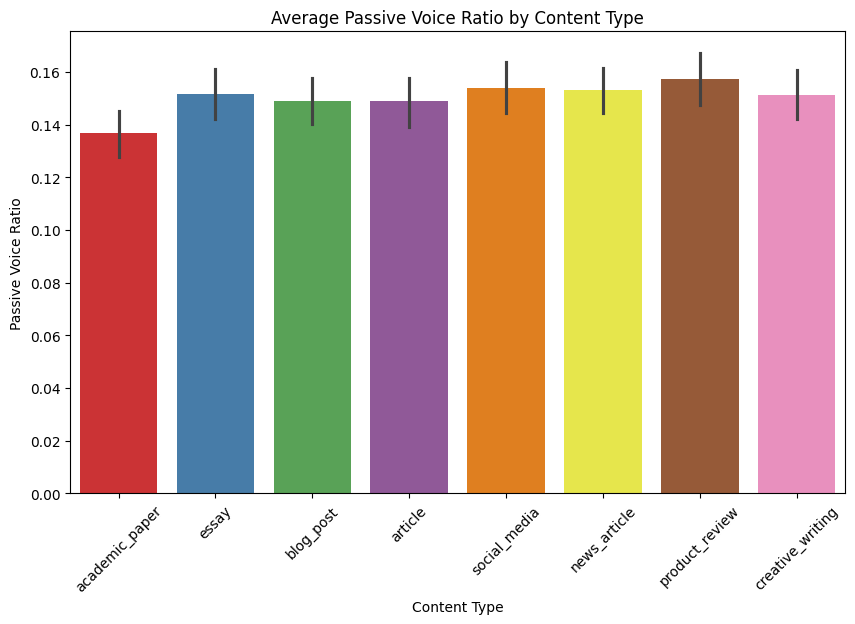

In [ ]:
# Passive voice ratio by content type
plt.figure(figsize=(10,6))
sns.barplot(data=df_ai_human, x="content_type", y="passive_voice_ratio", estimator="mean", palette='Set1')
plt.title("Average Passive Voice Ratio by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Passive Voice Ratio")
plt.xticks(rotation=45)
plt.show()

# Scatter plot readability vs sentence length

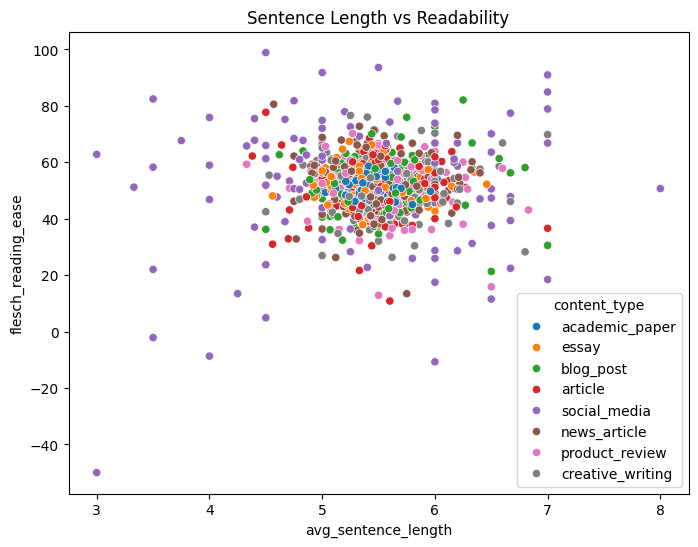

In [ ]:
# Scatter plot readability vs sentence length
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_ai_human, x="avg_sentence_length", y="flesch_reading_ease", hue="content_type")
plt.title("Sentence Length vs Readability")
plt.show()

The scatter plot is drawn with average sentence length on the horizontal axis and Flesch reading ease on the vertical axis. Each dot is colored based on content_type. It is shown that most texts are concentrated in the range of 5-6 words per sentence, where readability scores fall mainly between 40 and 70. Some scattered points are displayed outside this range, indicating outliers with either very high or very low readability.

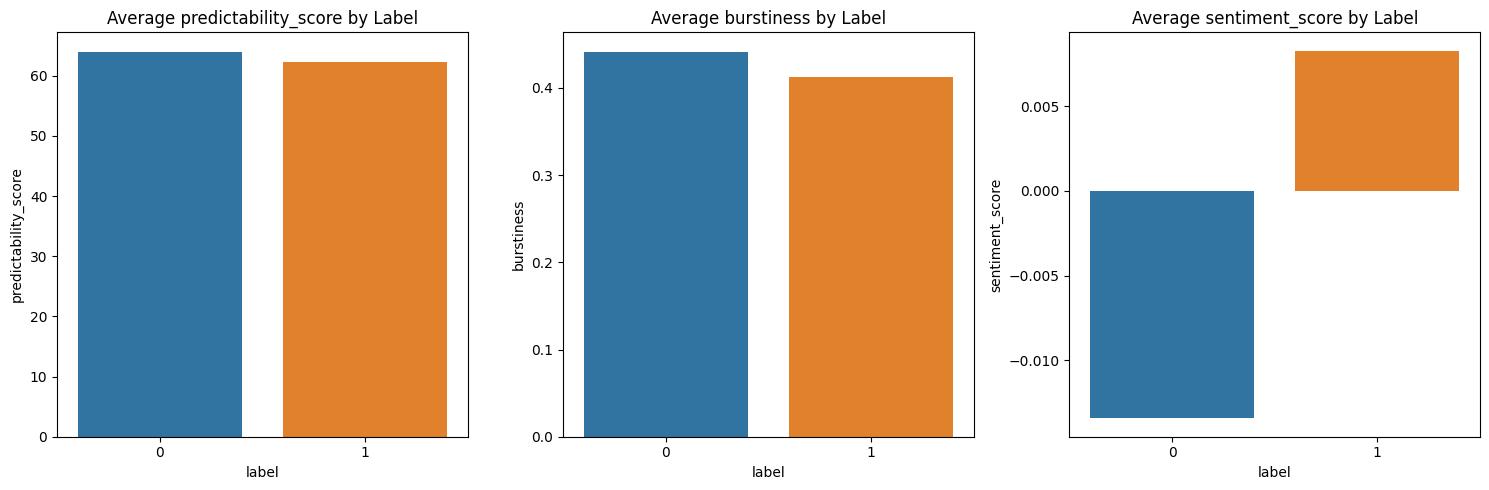

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['predictability_score', 'burstiness', 'sentiment_score']

plt.figure(figsize=(15,5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    # Bar plot of mean values by label
    sns.barplot(data=df_ai_human, x='label', y=feature, palette=['#1f77b4','#ff7f0e'], ci=None)
    plt.title(f'Average {feature} by Label')
plt.tight_layout()
plt.show()

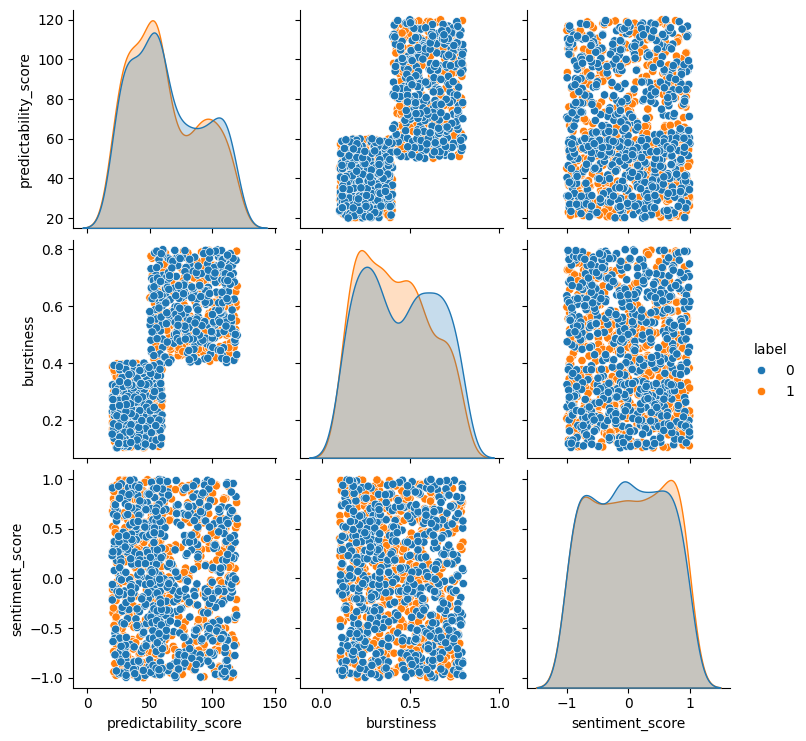

In [ ]:
sns.pairplot(df_ai_human, vars=['predictability_score','burstiness','sentiment_score'], hue='label', palette=['#1f77b4','#ff7f0e'])
plt.show()


This pair plot is generated to explore relationships between predictability_score, burstiness, and sentiment_score.

* Distributions of all three features are shown along the diagonal using density plots.
* The scatter plots show how predictability_score, burstiness, and sentiment_score vary between the two labels (0 and 1).
* Patterns in data clustering and overlap between the two labels are indicated.
* The differences in distributions and scatter densities are highlighted by the color of points for each label.

In short: relationships and distributions of the features by label are visualized and compared.


# Correlation

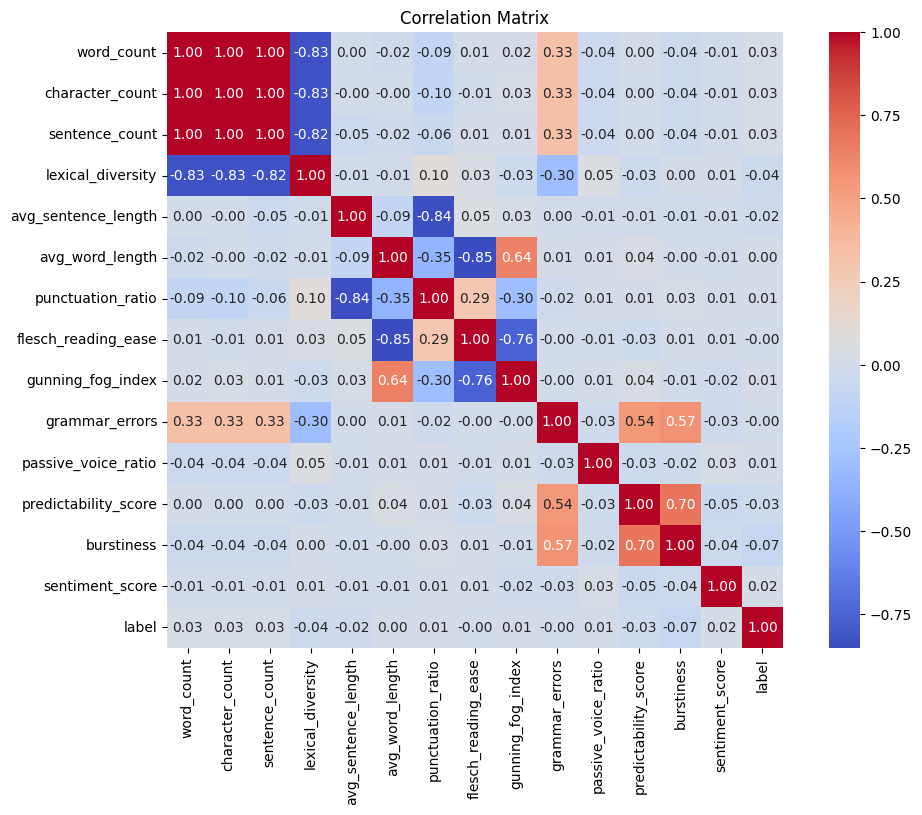

In [ ]:
plt.figure(figsize=(12, 8))
corr = df_ai_human.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

* word_count, character_count, and sentence_count are highly correlated (~1.00) and one or two will be dropped to reduce redundancy.
* avg_sentence_length and flesch_reading_ease are strongly negatively correlated (-0.82); longer sentences reduce readability.
* avg_word_length and gunning_fog_index are positively correlated (+0.60); longer words increase reading difficulty.
* Lexical diversity is strongly negatively correlated (-0.83 to -0.84) with text length; longer texts naturally lower diversity.


# Build ML Model

# Only Text (TF-IDF) with Classification Report

🔹 Model: Logistic Regression
Accuracy: 0.5212

Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.51      0.52       118
           1       0.52      0.53      0.53       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



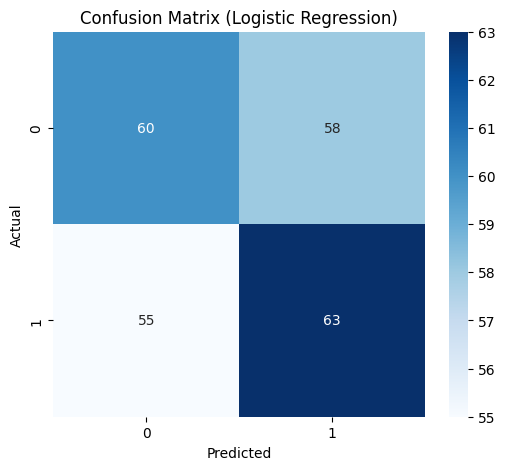

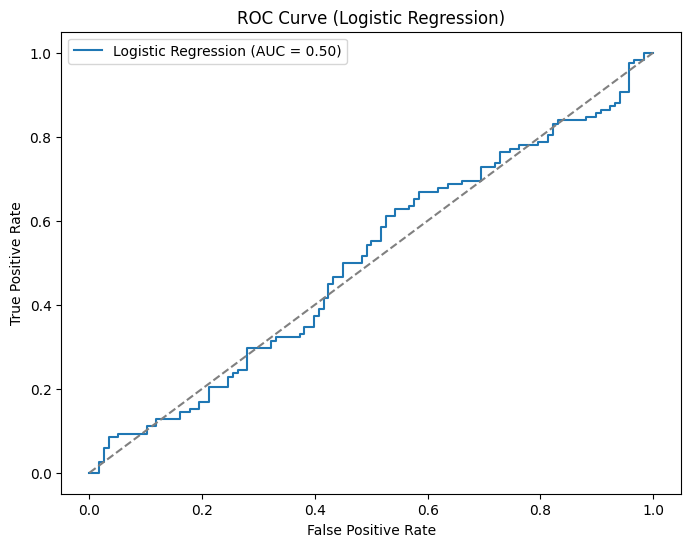

🔹 Model: Decision Tree
Accuracy: 0.5000

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.47      0.48       118
           1       0.50      0.53      0.52       118

    accuracy                           0.50       236
   macro avg       0.50      0.50      0.50       236
weighted avg       0.50      0.50      0.50       236



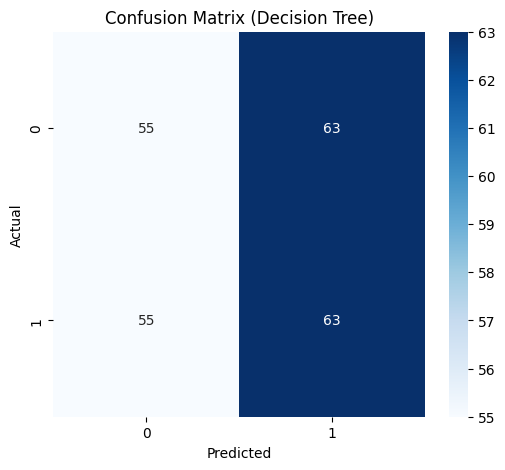

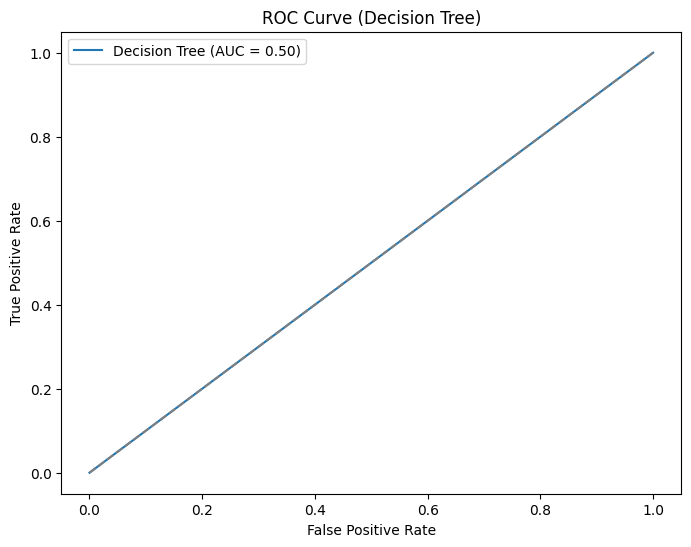

🔹 Model: Random Forest
Accuracy: 0.5424

Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.56      0.55       118
           1       0.54      0.53      0.53       118

    accuracy                           0.54       236
   macro avg       0.54      0.54      0.54       236
weighted avg       0.54      0.54      0.54       236



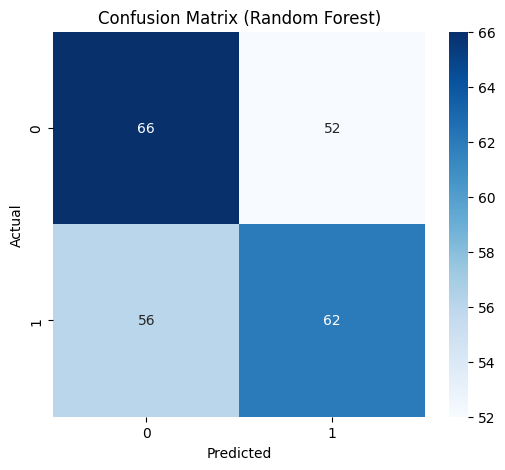

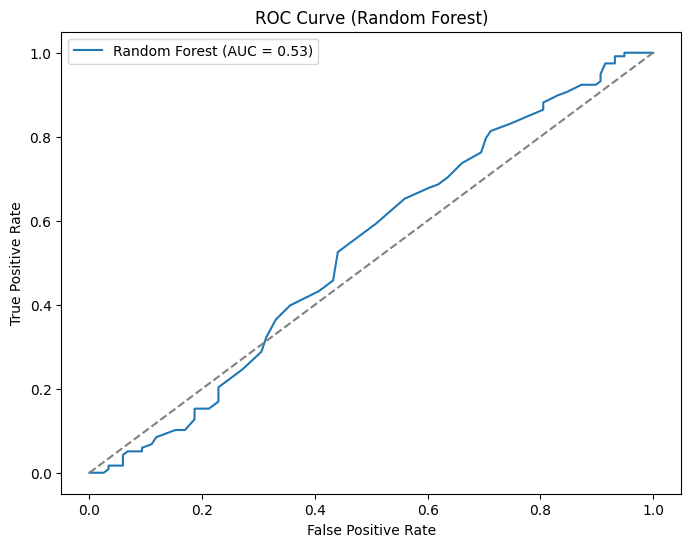

🔹 Model: SVM
Accuracy: 0.5212

Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       118
           1       0.52      0.52      0.52       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



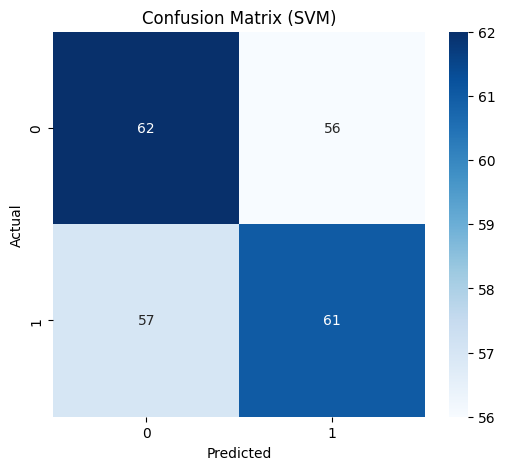

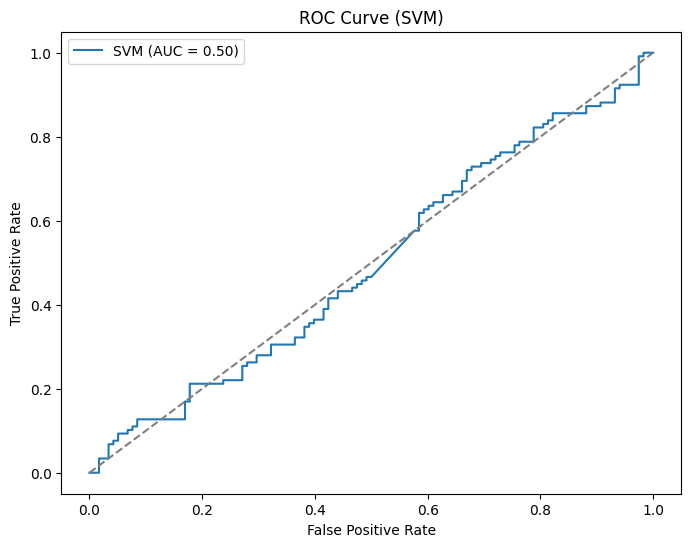

🔹 Model: KNN
Accuracy: 0.5085

Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.46      0.48       118
           1       0.51      0.56      0.53       118

    accuracy                           0.51       236
   macro avg       0.51      0.51      0.51       236
weighted avg       0.51      0.51      0.51       236



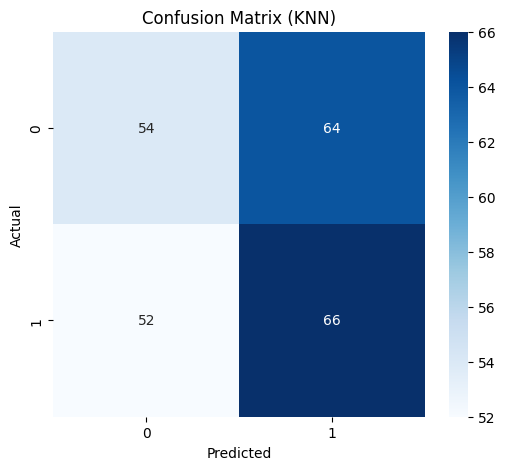

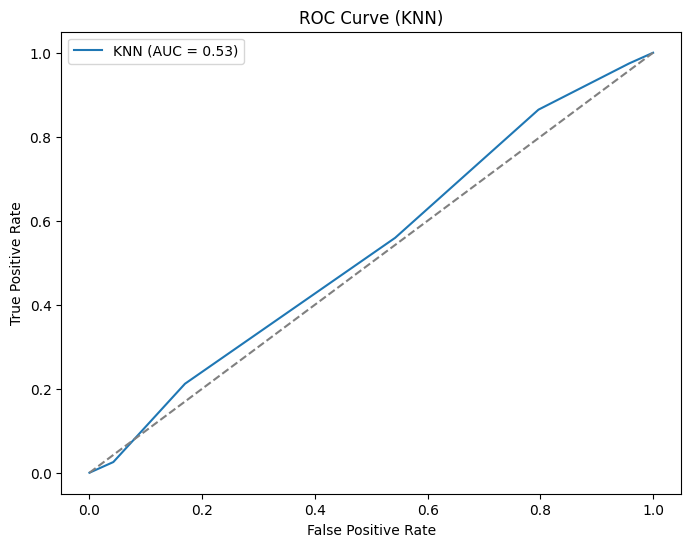

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Target
y = df_ai_human['label']

# TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df_ai_human['text_content'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    print("="*60)
    print(f"🔹 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Classification Report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0,1],[0,1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({name})")
    plt.legend()
    plt.show()

    results[name] = acc


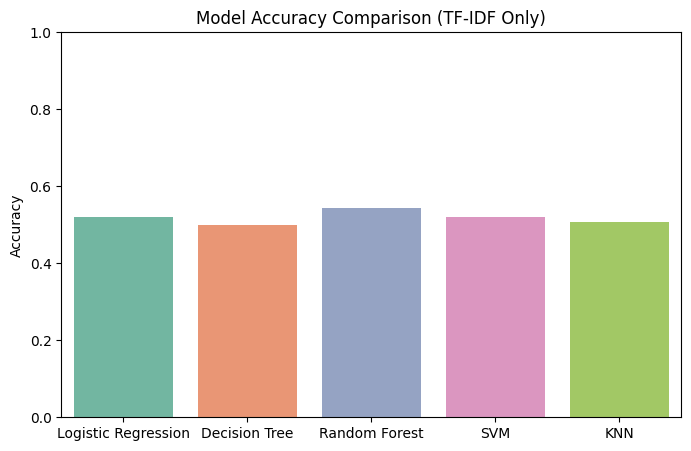

In [ ]:
# Accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")
plt.title("Model Accuracy Comparison (TF-IDF Only)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# Hybrid (TF-IDF + Numeric) with Classification Report

🔹 Model: Logistic Regression
Accuracy: 0.5466

Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.53      0.54       118
           1       0.55      0.56      0.55       118

    accuracy                           0.55       236
   macro avg       0.55      0.55      0.55       236
weighted avg       0.55      0.55      0.55       236



<Figure size 800x600 with 0 Axes>

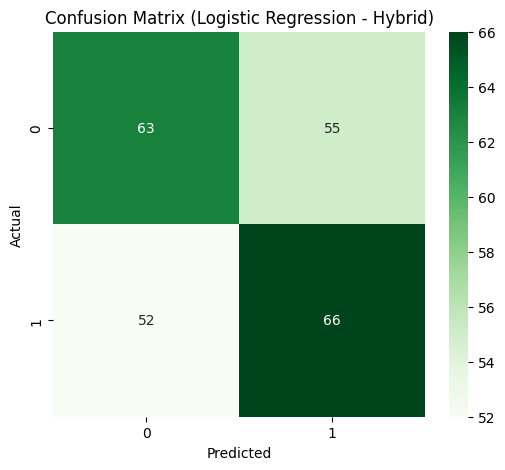

🔹 Model: Decision Tree
Accuracy: 0.4831

Classification Report:

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       118
           1       0.48      0.45      0.46       118

    accuracy                           0.48       236
   macro avg       0.48      0.48      0.48       236
weighted avg       0.48      0.48      0.48       236



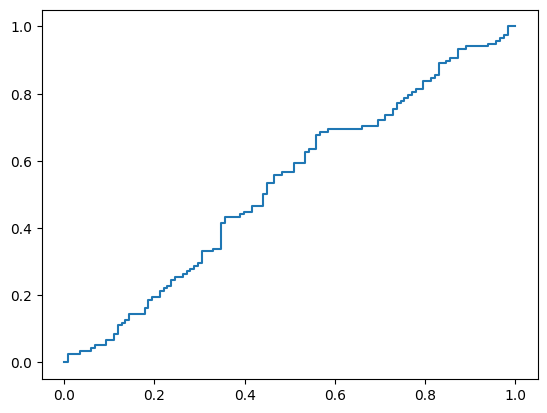

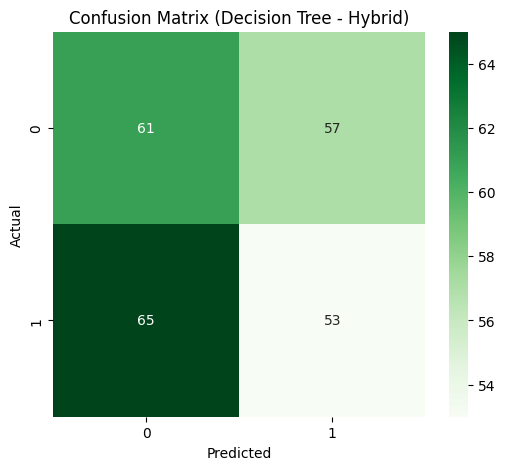

🔹 Model: Random Forest
Accuracy: 0.5212

Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.51      0.52       118
           1       0.52      0.53      0.53       118

    accuracy                           0.52       236
   macro avg       0.52      0.52      0.52       236
weighted avg       0.52      0.52      0.52       236



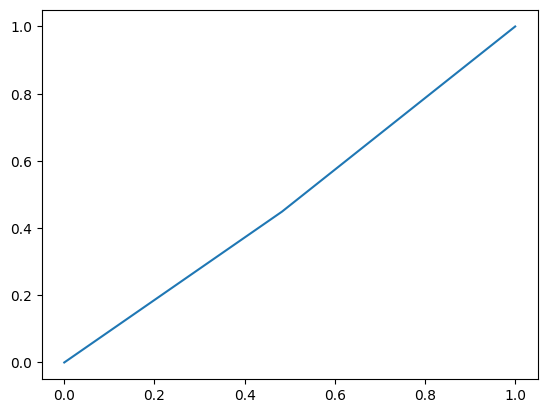

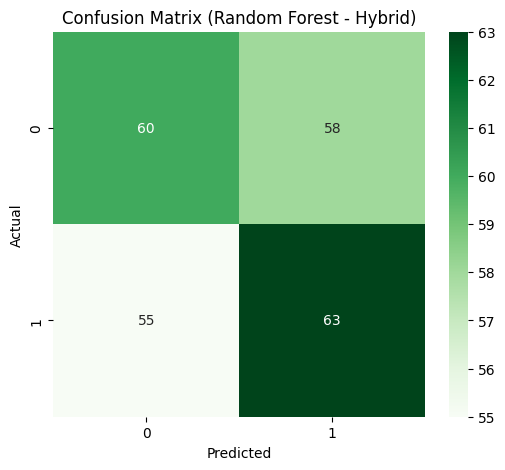

🔹 Model: SVM
Accuracy: 0.5466

Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.44      0.49       118
           1       0.54      0.65      0.59       118

    accuracy                           0.55       236
   macro avg       0.55      0.55      0.54       236
weighted avg       0.55      0.55      0.54       236



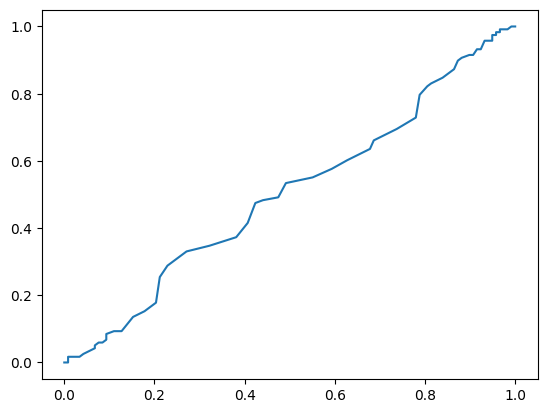

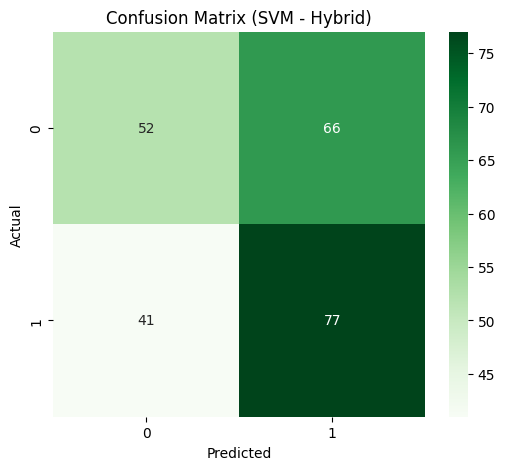

🔹 Model: KNN
Accuracy: 0.5508

Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.58      0.56       118
           1       0.55      0.53      0.54       118

    accuracy                           0.55       236
   macro avg       0.55      0.55      0.55       236
weighted avg       0.55      0.55      0.55       236



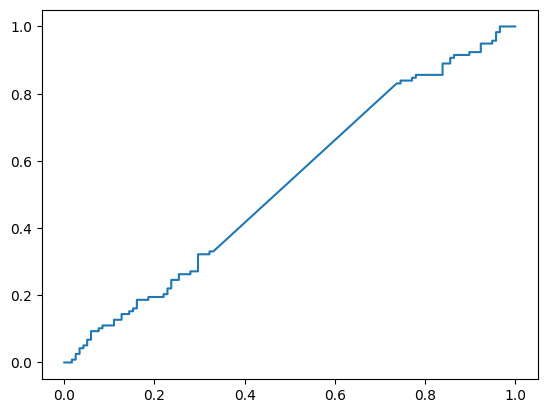

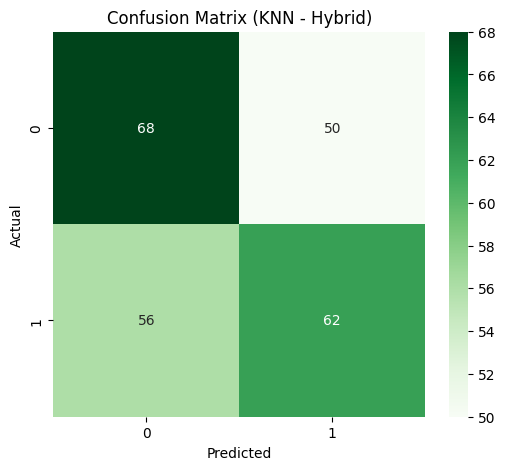

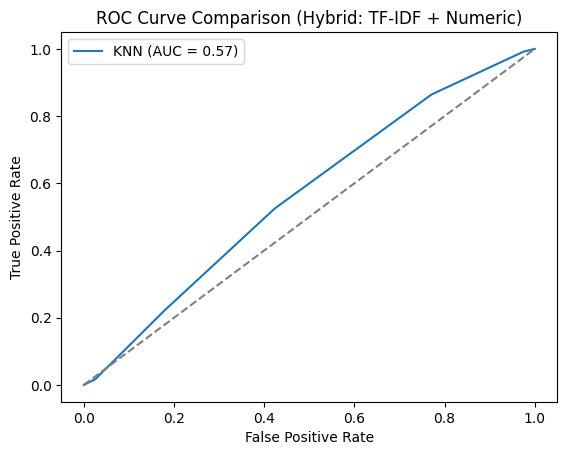

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# =====================

X_text = df_ai_human['text_content']
num_features = df_ai_human.drop(columns=['text_content', 'content_type', 'label'])

# Scale numeric features
scaler = StandardScaler()
X_num = scaler.fit_transform(num_features)

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text_tfidf = vectorizer.fit_transform(X_text)

# Combine text + numeric features
X = hstack([X_text_tfidf, X_num])
y = df_ai_human['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}
plt.figure(figsize=(8,6))

# Loop through models

for name, model in models.items():
    print("="*60)
    print(f"🔹 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")

    # Classification Report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Confusion Matrix ({name} - Hybrid)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")


# Final ROC Comparison
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Hybrid: TF-IDF + Numeric)")
plt.legend()
plt.show()

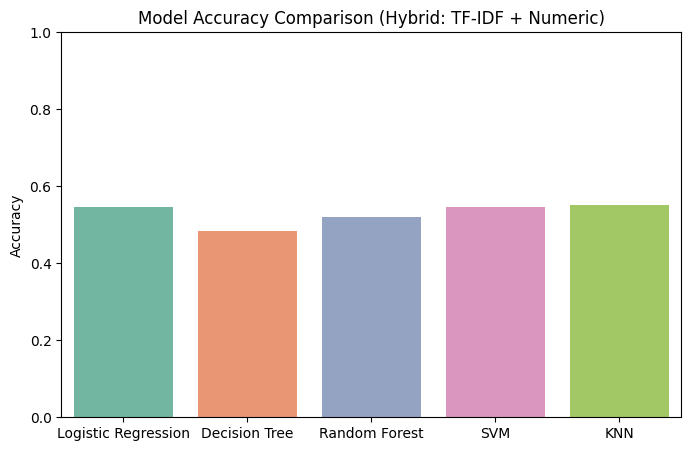

In [ ]:
# Accuracy Comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Set2")
plt.title("Model Accuracy Comparison (Hybrid: TF-IDF + Numeric)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

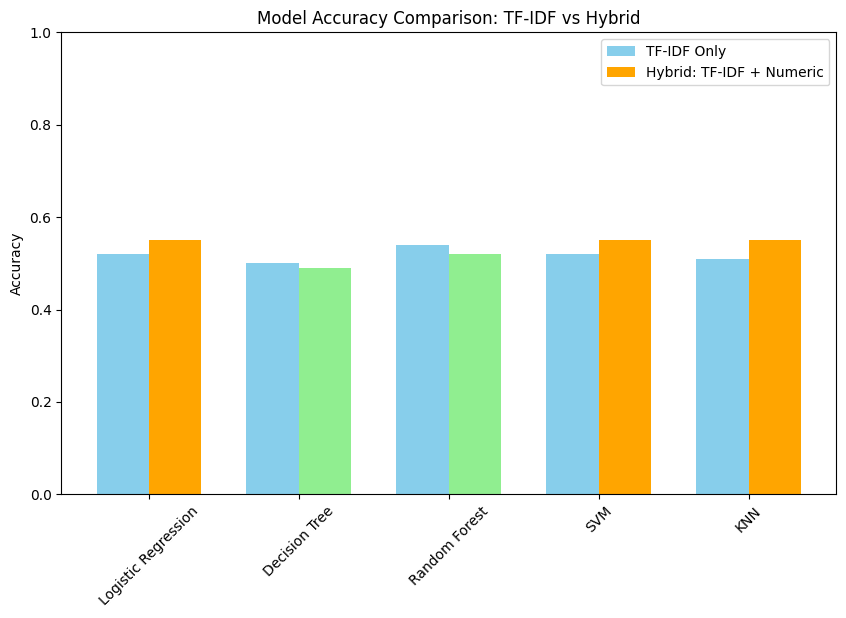

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']

# Accuracy values from your images/plots
tfidf_acc = [0.52, 0.50, 0.54, 0.52, 0.51]      # TF-IDF only
hybrid_acc = [0.55, 0.49, 0.52, 0.55, 0.55]     # Hybrid TF-IDF + Numeric

# Bar positions
x = np.arange(len(models))
width = 0.35

# Highlight the highest accuracy
all_values = tfidf_acc + hybrid_acc
max_val = max(all_values)
colors_tfidf = ['orange' if val == max_val else 'skyblue' for val in tfidf_acc]
colors_hybrid = ['orange' if val == max_val else 'lightgreen' for val in hybrid_acc]

# Plot
plt.figure(figsize=(10,6))
plt.bar(x - width/2, tfidf_acc, width, color=colors_tfidf, label='TF-IDF Only')
plt.bar(x + width/2, hybrid_acc, width, color=colors_hybrid, label='Hybrid: TF-IDF + Numeric')
plt.xticks(x, models, rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison: TF-IDF vs Hybrid")
plt.legend()
plt.show()


Ensemble Model Accuracy: 0.5127

Classification Report (Ensemble):

              precision    recall  f1-score   support

           0       0.51      0.48      0.50       118
           1       0.51      0.54      0.53       118

    accuracy                           0.51       236
   macro avg       0.51      0.51      0.51       236
weighted avg       0.51      0.51      0.51       236



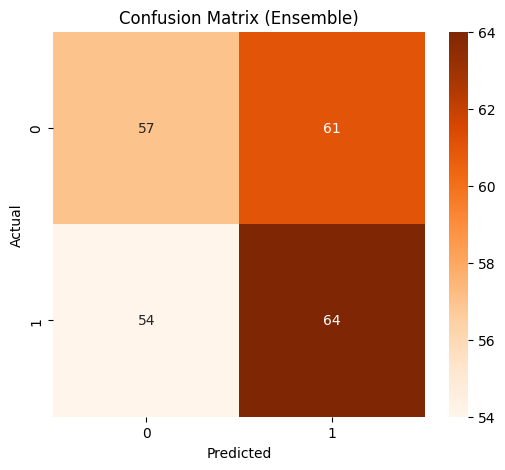

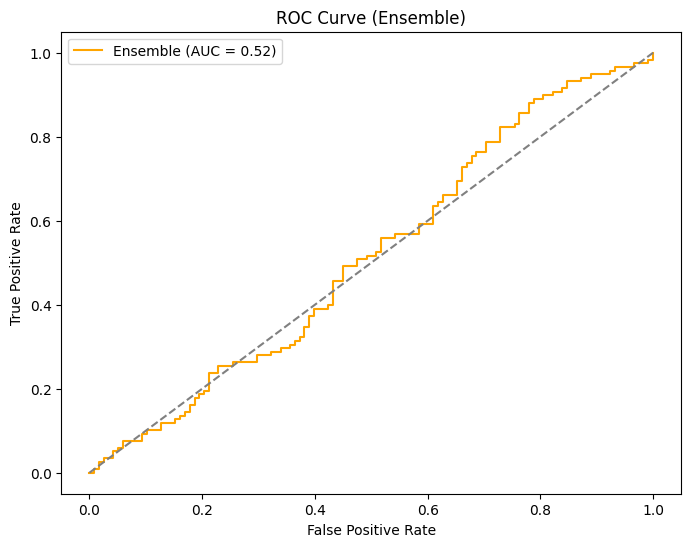

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the ensemble model (soft voting)
ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    voting='soft'  # Use 'hard' for majority vote
)

# Train ensemble
ensemble.fit(X_train, y_train)

# Predictions
y_pred_ensemble = ensemble.predict(X_test)
y_pred_proba_ensemble = ensemble.predict_proba(X_test)[:,1]

# Accuracy
acc_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {acc_ensemble:.4f}")

# Classification Report
print("\nClassification Report (Ensemble):\n")
print(classification_report(y_test, y_pred_ensemble))

# Confusion Matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(6,5))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (Ensemble)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

plt.figure(figsize=(8,6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble (AUC = {roc_auc_ensemble:.2f})", color='orange')
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Ensemble)")
plt.legend()
plt.show()

# Add to results for comparison
results['Ensemble'] = acc_ensemble


Hybrid Ensemble Accuracy: 0.5127

Classification Report (Hybrid Ensemble):

              precision    recall  f1-score   support

           0       0.51      0.48      0.50       118
           1       0.51      0.54      0.53       118

    accuracy                           0.51       236
   macro avg       0.51      0.51      0.51       236
weighted avg       0.51      0.51      0.51       236



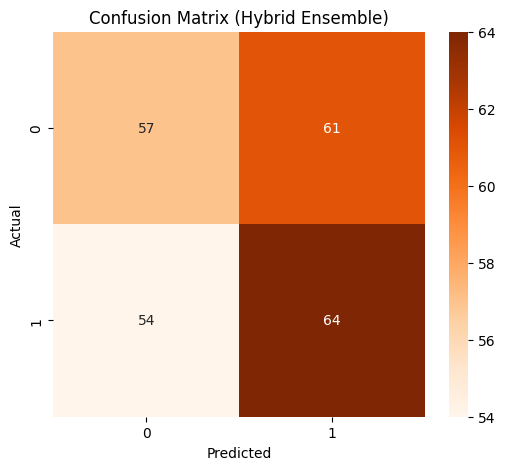

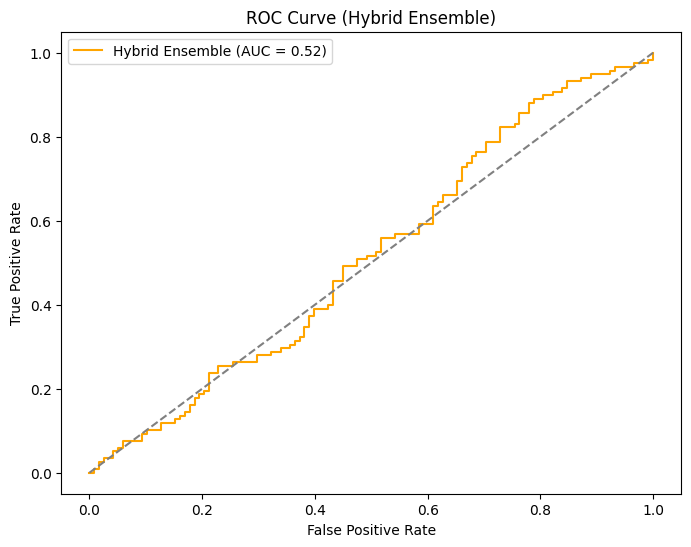

In [ ]:
from sklearn.ensemble import VotingClassifier

# ===================== Hybrid Ensemble Model =====================
ensemble_hybrid = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('svm', SVC(probability=True, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    voting='soft'  # Use 'hard' for majority voting
)

# Train ensemble on hybrid features
ensemble_hybrid.fit(X_train, y_train)

# Predictions
y_pred_hybrid = ensemble_hybrid.predict(X_test)
y_pred_proba_hybrid = ensemble_hybrid.predict_proba(X_test)[:,1]

# Accuracy
acc_hybrid = accuracy_score(y_test, y_pred_hybrid)
print(f"Hybrid Ensemble Accuracy: {acc_hybrid:.4f}")

# Classification Report
print("\nClassification Report (Hybrid Ensemble):\n")
print(classification_report(y_test, y_pred_hybrid))

# Confusion Matrix
cm_hybrid = confusion_matrix(y_test, y_pred_hybrid)
plt.figure(figsize=(6,5))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (Hybrid Ensemble)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test, y_pred_proba_hybrid)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

plt.figure(figsize=(8,6))
plt.plot(fpr_hybrid, tpr_hybrid, label=f"Hybrid Ensemble (AUC = {roc_auc_hybrid:.2f})", color='orange')
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Hybrid Ensemble)")
plt.legend()
plt.show()

# Update results for accuracy comparison
results['Hybrid Ensemble'] = acc_hybrid

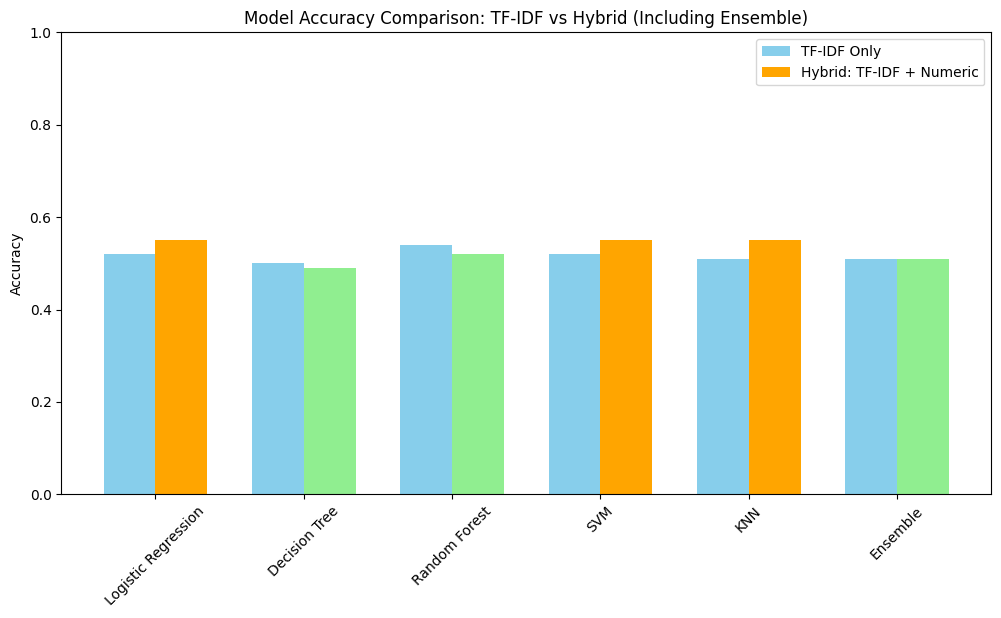

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Ensemble']

# Accuracy values
tfidf_acc = [0.52, 0.50, 0.54, 0.52, 0.51, 0.51]      # TF-IDF only (ensemble included)
hybrid_acc = [0.55, 0.49, 0.52, 0.55, 0.55, 0.51]     # Hybrid (ensemble included)

# Bar positions
x = np.arange(len(models))
width = 0.35

# Highlight the highest accuracy
all_values = tfidf_acc + hybrid_acc
max_val = max(all_values)
colors_tfidf = ['orange' if val == max_val else 'skyblue' for val in tfidf_acc]
colors_hybrid = ['orange' if val == max_val else 'lightgreen' for val in hybrid_acc]

# Plot
plt.figure(figsize=(12,6))
plt.bar(x - width/2, tfidf_acc, width, color=colors_tfidf, label='TF-IDF Only')
plt.bar(x + width/2, hybrid_acc, width, color=colors_hybrid, label='Hybrid: TF-IDF + Numeric')
plt.xticks(x, models, rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison: TF-IDF vs Hybrid (Including Ensemble)")
plt.legend()
plt.show()

